## Question 0
We have this function:
$$
f(x) = \begin{cases} 
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0 
\end{cases}
$$
This function jumps at \( x = 0 \).

- For \( x < 0 \): \( f'(x) = 0 \) (constant function)
- For \( x > 0 \): \( f'(x) = 0 \) (constant function)
- At \( x = 0 \): \( f'(0) \) doesn't exist

So \( f'(x) = 0 \) for all \( x \) where the derivative exists, but \( f(-1) = 0 \neq 1 = f(1) \).

## Question 1

We have this setting:

$$
X \sim \text{Uniform}[0, 1]
$$
$$
Y|X=x \sim 0.9 \cdot \delta(y - x) + 0.1 \cdot \delta(y - x - 10)
$$

Where $\delta$ is the Dirac delta function. This means:

- With probability 0.9: $$ Y = X $$
- With probability 0.1: $$ Y = X + 10 $$

For this distribution:

- Squared loss Bayes predictor: $$ f^*_{\text{squared}}(x) = E[Y|X=x] = 0.9x + 0.1(x+10) = x + 1 $$
- Absolute loss Bayes predictor: $$ f^*_{\text{absolute}}(x) = \text{median}(Y|X=x) = x $$ since $$ P(Y=x|X=x) = 0.9 > 0.5 $$

We have $$ f_{\text{absolute}}(x) = x \neq x + 1 = f_{\text{squared}}(x) $$.

EMPIRICAL RISK COMPARISON

Test set size: 50000

SQUARED LOSS RISKS:
R_squared(f*_squared) = 8.7584
R_squared(f*_absolute) = 9.6980
R_squared(h) = 8.9782

ABSOLUTE LOSS RISKS:
R_absolute(f*_squared) = 1.7758
R_absolute(f*_absolute) = 0.9698
R_absolute(h) = 1.3728

KEY FINDING:
R_absolute(h) < R_absolute(f*_squared): True
Difference: 0.4030


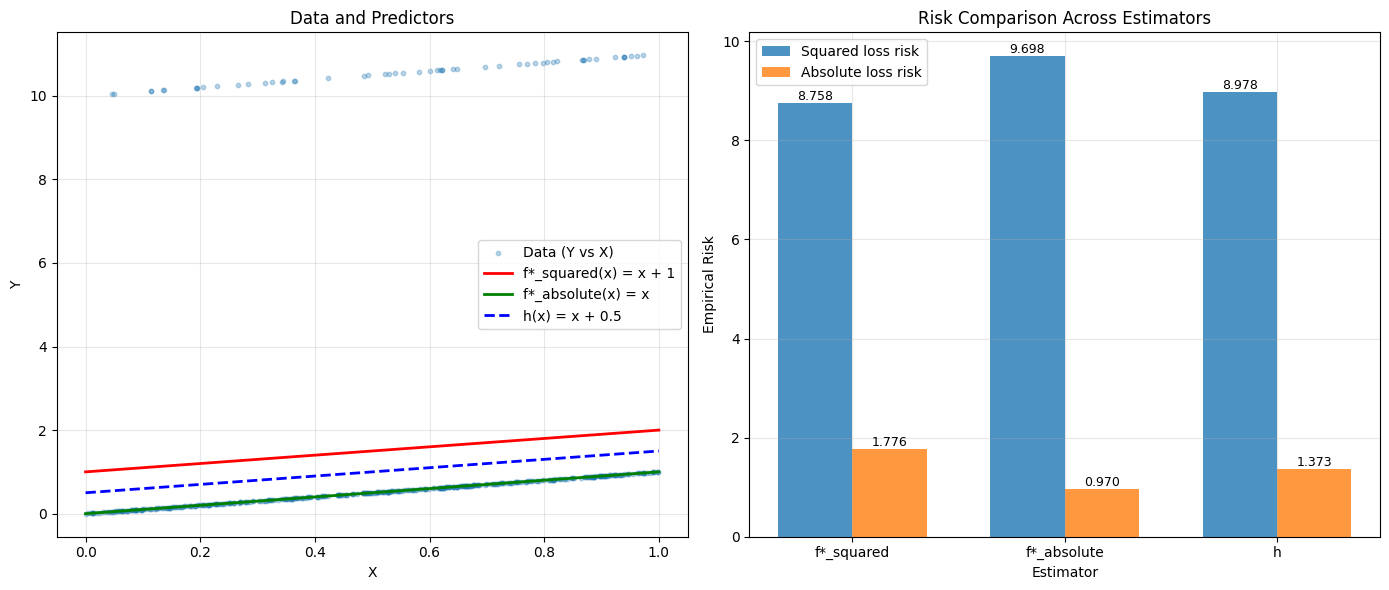

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_data(n_samples):
    X = np.random.uniform(0, 1, n_samples)
    noise_indicator = np.random.binomial(1, 0.1, n_samples)
    Y = X + 10 * noise_indicator
    return X, Y

def f_star_squared(x):
    return x + 1

def f_star_absolute(x):
    return x

def h_estimator(x):
    return x + 0.5

def compute_squared_risk(predictions, true_values):
    return np.mean((predictions - true_values) ** 2)

def compute_absolute_risk(predictions, true_values):
    return np.mean(np.abs(predictions - true_values))

n_test = 50000
X_test, Y_test = generate_data(n_test)

pred_f_squared = f_star_squared(X_test)
pred_f_absolute = f_star_absolute(X_test)
pred_h = h_estimator(X_test)

squared_risk_f_squared = compute_squared_risk(pred_f_squared, Y_test)
squared_risk_f_absolute = compute_squared_risk(pred_f_absolute, Y_test)
squared_risk_h = compute_squared_risk(pred_h, Y_test)

absolute_risk_f_squared = compute_absolute_risk(pred_f_squared, Y_test)
absolute_risk_f_absolute = compute_absolute_risk(pred_f_absolute, Y_test)
absolute_risk_h = compute_absolute_risk(pred_h, Y_test)

print("EMPIRICAL RISK COMPARISON")
print(f"\nTest set size: {n_test}")
print("\nSQUARED LOSS RISKS:")
print(f"R_squared(f*_squared) = {squared_risk_f_squared:.4f}")
print(f"R_squared(f*_absolute) = {squared_risk_f_absolute:.4f}")
print(f"R_squared(h) = {squared_risk_h:.4f}")

print("\nABSOLUTE LOSS RISKS:")
print(f"R_absolute(f*_squared) = {absolute_risk_f_squared:.4f}")
print(f"R_absolute(f*_absolute) = {absolute_risk_f_absolute:.4f}")
print(f"R_absolute(h) = {absolute_risk_h:.4f}")

print("\nKEY FINDING:")
print(f"R_absolute(h) < R_absolute(f*_squared): {absolute_risk_h < absolute_risk_f_squared}")
print(f"Difference: {absolute_risk_f_squared - absolute_risk_h:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

n_vis = 500
X_vis, Y_vis = generate_data(n_vis)
X_plot = np.linspace(0, 1, 100)

ax1.scatter(X_vis, Y_vis, alpha=0.3, s=10, label='Data (Y vs X)')
ax1.plot(X_plot, f_star_squared(X_plot), 'r-', linewidth=2, label='f*_squared(x) = x + 1')
ax1.plot(X_plot, f_star_absolute(X_plot), 'g-', linewidth=2, label='f*_absolute(x) = x')
ax1.plot(X_plot, h_estimator(X_plot), 'b--', linewidth=2, label='h(x) = x + 0.5')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Data and Predictors')
ax1.legend()
ax1.grid(True, alpha=0.3)

estimators = ['f*_squared', 'f*_absolute', 'h']
squared_risks = [squared_risk_f_squared, squared_risk_f_absolute, squared_risk_h]
absolute_risks = [absolute_risk_f_squared, absolute_risk_f_absolute, absolute_risk_h]

x_pos = np.arange(len(estimators))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, squared_risks, width, label='Squared loss risk', alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, absolute_risks, width, label='Absolute loss risk', alpha=0.8)

ax2.set_xlabel('Estimator')
ax2.set_ylabel('Empirical Risk')
ax2.set_title('Risk Comparison Across Estimators')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(estimators)
ax2.legend()
ax2.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Question 2

To find the Bayes predictor for absolute loss, we need to minimize:

$$
f^*_{\text{absolute}}(x) = \arg\min_{z \in \mathbb{R}} E[|y - z| \mid X = x]
$$

Let's define:

$$
g(z) = \int_{y \in \mathbb{R}} |y - z| p_{Y|X=x}(y) \, dy
$$

We need to find the \( z \) that minimizes \( g(z) \). We can split this integral:

$$
g(z) = \int_{-\infty}^{z} (z - y) p_{Y|X=x}(y) \, dy + \int_{z}^{\infty} (y - z) p_{Y|X=x}(y) \, dy
$$

Taking the derivative with respect to \( z \):

$$
\frac{dg}{dz} = \int_{-\infty}^{z} p_{Y|X=x}(y) \, dy - \int_{z}^{\infty} p_{Y|X=x}(y) \, dy
$$

Using the fact that $$
\int_{-\infty}^{z} p_{Y|X=x}(y) \, dy = P(Y \leq z | X = x)
$$
and
$$
\int_{z}^{\infty} p_{Y|X=x}(y) \, dy = P(Y > z | X = x) = 1 - P(Y \leq z | X = x)
$$
then:

$$
\frac{dg}{dz} = P(Y \leq z | X = x) - (1 - P(Y \leq z | X = x)) = 2P(Y \leq z | X = x) - 1
$$

Setting the derivative to zero:

$$
2P(Y \leq z | X = x) - 1 = 0
$$

$$
P(Y \leq z | X = x) = \frac{1}{2}
$$

This shows that the minimizer \( z \) is the value where the conditional CDF equals \( \frac{1}{2} \), which is precisely the median of the conditional distribution \( P(Y|X=x) \).

Therefore:

$$
f^*_{\text{absolute}}(x) = \text{median}(Y | X = x)
$$

Verification of second-order condition:

The second derivative is:

$$
\frac{d^2g}{dz^2} = 2p_{Y|X=x}(z) \geq 0
$$

Since the density is non-negative, this confirms that our critical point is indeed a minimum.

Summary: The Bayes predictor for absolute loss is the conditional median, while for squared loss it's the conditional mean. This explains why they differ in general, especially for asymmetric conditional distributions like in Question 1.